# BL40A2030 Wireless Communication Networks

## Week 3 - Assignment

### Author: Jaime Arturo Álvarez Orgaz

**1. (M/M/1/K queue) Go to the p. 149 (sectin 7.2) of [this book](http://irh.inf.unideb.hu/user/jsztrik/publications/books/GlobeEdit_Basic_Queueing_Theory_Sztrik_2016.pdf).**

(a) Plot the block probability (probability of the queue is full when a new arrival happens) $P_K$ as a function of $K$ (size of the queue) for $\lambda = 1$ (arrival rate) and $\mu=2$ (service rate). Note that $P_K$ is the probability of having $K$ elements in the system. Use $K$ between 0 and 10.

(b) Plot the expected waiting time in the queue system $\bar{W}$ as a function of $K$ (size of the queue) for $\lambda = 1$ (arrival rate) and $\mu=2$ (service rate). Note that $P_K$ is the probability of having $K$ elements in the system. Use $K$ between 0 and 10.

(c) Discuss the trade-off involved between waiting time and block probability.



**2. ($x$ M/M/1 queues in tandem) Study the network of $x$ queues, a special case of the system presented in Fig. 4.16 in p. 109 from [3]. Consider that the arrival rate is $\lambda$ and the service rate is $\mu$ (the same for all servers) so that $\lambda$ smaller that $\mu$** 

- What is the probability that all $x$ queues are empty at the same time as a function of $\lambda$, $\mu$ and $\rho = \lambda/\mu$? 
- Plot this probability as a function of $\lambda$ for $\mu = 3$. Plot in the same figure using the values of $x=1,2,3,4,5$.

**3. (Optimize Slotted Aloha) In the tutorial, an optimization related to the pure Aloha was presented. Follow the same approach and optimize the Slotted Aloha. Plot the results together with the one presented in the tutorial.** 


**4. (Theory) Explain with your own words the basics of the following protocols. Whenever it is possible, compare their differences in terms of throughput, delay and implementation complexity. Use [this slides](http://www.cs.jhu.edu/~cs647/mac_lecture_2.pdf) to help.** 

- Pure Aloha
- Slotted Aloha
- CSMA non-persistant
- CSMA 1-persistant
- CSMA p-persistant



In [22]:
import sympy as sp
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
import queue
import copy
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1.a**

[0.3333333333333333, 0.14285714285714285, 0.06666666666666667, 0.03225806451612903, 0.015873015873015872]
Blocked probability (analysis): 0.015873015873015872


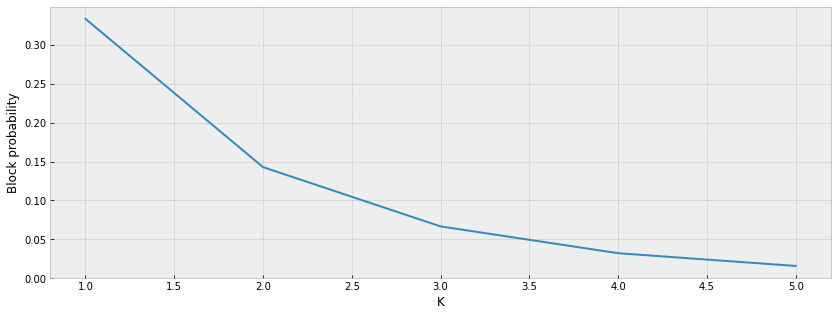

In [23]:
#M/M/1/k
# Input Parameters -- Long one
total_time = 50 #hours
IAT_rate = 1 #elements arriving/hour
ST_rate = 2  #elements served/hour
rho = IAT_rate/ST_rate
size_limit=5 # this is k (size limit of the queue)

block_prob = []
x = range(1, size_limit+1)

for i in x:
    block_prob.append(((1 - rho) * rho**i / (1-rho**(i+1))))

print (block_prob)

plt.figure(figsize=(14,5))
plt.plot(x, block_prob)
plt.xlabel("K")
plt.ylabel("Block probability")

print('Blocked probability (analysis):', (1 -  rho)* (rho**size_limit)/(1-rho**(size_limit+1)))

**1.b**

[0.3333333333333333, 0.14285714285714285, 0.06666666666666667, 0.03225806451612903, 0.015873015873015872]
[0.6666666666666666, 0.5714285714285714, 0.5333333333333333, 0.5161290322580645, 0.5079365079365079]
[0.3333333333333333, 0.5714285714285714, 0.7333333333333333, 0.8387096774193549, 0.9047619047619048]
[0.6666666666666667, 0.8571428571428572, 0.9333333333333333, 0.967741935483871, 0.9841269841269842]
[-5.551115123125783e-17, 0.1428571428571428, 0.2666666666666666, 0.3548387096774194, 0.4126984126984127]
[-8.326672684688673e-17, 0.16666666666666657, 0.28571428571428564, 0.3666666666666667, 0.4193548387096774]


Text(0, 0.5, 'Waiting time in queue')

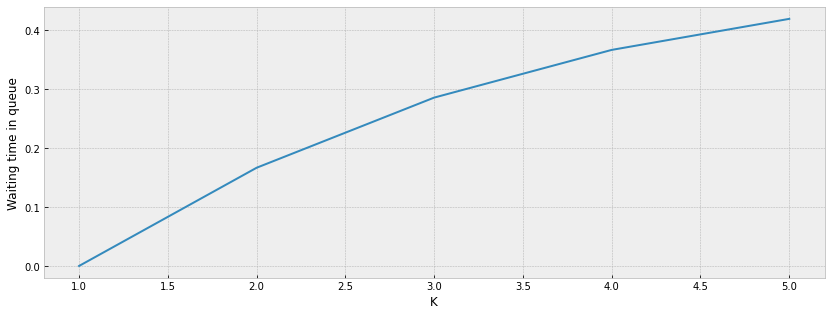

In [24]:
#M/M/1/k
# Input Parameters -- Long one
total_time = 50 #hours
IAT_rate = 1 #elements arriving/hour
ST_rate = 2  #elements served/hour
rho = IAT_rate/ST_rate
size_limit=5 # this is k (size limit of the queue)

block_prob = []
initial_p = []
l = []
N = []
Q = []
W = []
x = range(1, size_limit+1)

for i in x:
    block_prob.append(((1 - rho) * rho**i / (1-rho**(i+1))))
    
print (block_prob)

for i in x:
    initial_p.append(((1 - rho) * rho**0 / (1-rho**(i+1))))

print (initial_p)

for i in x:
    N.append(
        (rho*(1-(i+1)*rho**i + i*rho**(i+1)))
             /((1-rho)*(1-rho**(i+1))))

print (N)

for i in x:
    l.append((1-block_prob[(i-1)])*IAT_rate)
    
print(l)

for i in x:
    Q.append(N[(i-1)] - (1-initial_p[(i-1)]))
    
print(Q)


for i in x:
    W.append(Q[(i-1)]/l[(i-1)])

print(W)


plt.figure(figsize=(14,5))
plt.plot(x, W)
plt.xlabel("K")
plt.ylabel("Waiting time in queue")

**1.3**

In the first graphic, each time the K increases, the block probablity decreases. In the second graphic we can see that is the other way around, the waiting time increases each time the K increase. In conclusion, if the K increases we will have less block probability but more waiting time in the queue.

**2.1**

The probability that all $x$ queues are empty at the same time as a function of $\lambda$, $\mu$ and $\rho = \lambda/\mu$ is Prob_empty[0 customers in the ith queue] = P(0) = (1 - P_i)   * P_i^0. In this case P(0) = (1-P)

P_i = L/u_i.

The joint probability of queue lengths of k queues is the product of individual probabilities. This means that: P(n1, n2, ..., nk) = ((1-p1)*p1^n1) * ((1-p2)*p2^n2) * ... * ((1-pk)*pk^nk) = p1(n1) * p2(n2) * ... P(nk)

All queues have the same probability, this means that the joint probability is (1-p)^n_total.

**2.2**

Text(0, 0.5, 'Probability')

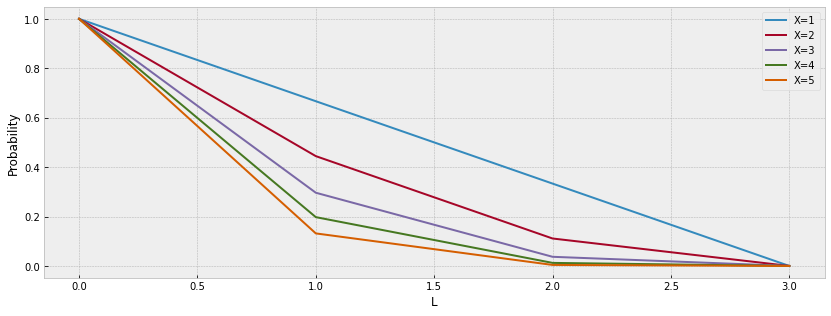

In [25]:
L = range(0,4)
x = range(1,6)
prob = []
queues = []
ST_rate = 3

for i in x:
    for j in L:
        prob.append((1- j/ST_rate)**i)
        #print ("ESTO ES PROB", prob)
    queues.append(prob)
    prob = []
#print ("ESTO ES QUEUE", queues)

plt.figure(figsize=(14,5))
for i in x:
    plt.plot(L, queues[(i-1)], label=F'X={i}')

plt.legend()
plt.xlabel("L")
plt.ylabel("Probability")


**3**

In [26]:
# Visualization for sympy
sp.init_printing() 

In [27]:
#Define a varible in sympy
G = sp.symbols('G')

**ALOHA**

In [28]:
S = G * sp.exp(-2*G)
S

In [29]:
diff_S= sp.diff(S,G)
diff_S

In [30]:
opt_G = sp.solve(diff_S, G)
opt_G[0] # solution comes as an array, need to get the first element

In [31]:
opt_S = S.subs(G,opt_G[0])
opt_S

**SLOTTED ALOHA**

In [32]:
S_Slotted = G * sp.exp(-G)
S_Slotted

In [33]:
diff_S_Slotted = sp.diff(S_Slotted,G)
diff_S_Slotted

In [34]:
opt_G_Slotted = sp.solve(diff_S_Slotted, G)
opt_G_Slotted[0]

In [35]:
opt_S_Slotted = S_Slotted.subs(G,opt_G_Slotted[0])
opt_S_Slotted

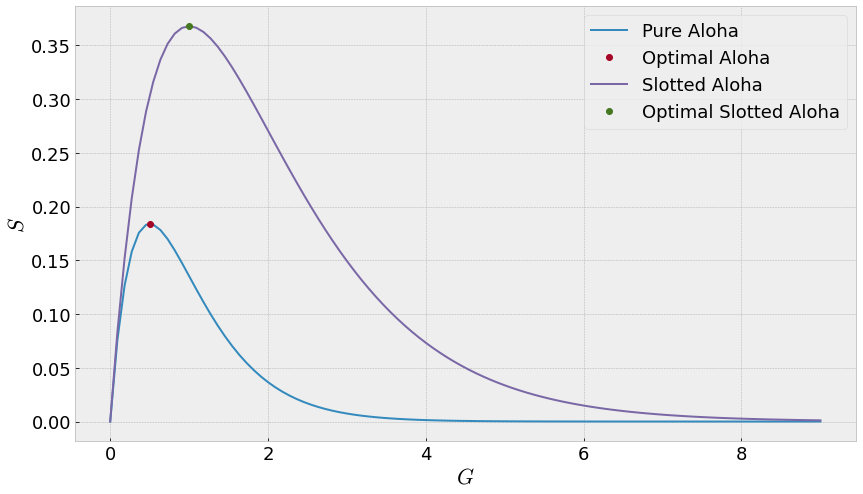

In [36]:
#Plotting using numpy
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
####
#Pure aloha
num_G = np.linspace(0, 9 , 100) 
num_S = num_G * np.exp(-2*num_G)
#
plt.plot(num_G, num_S,'-',label='Pure Aloha')
plt.plot(opt_G, opt_S,'o',label='Optimal Aloha')
####
#Slotted aloha
num_S = num_G * np.exp(-num_G)
#
plt.plot(num_G, num_S,'-',label='Slotted Aloha')
plt.plot(opt_G_Slotted, opt_S_Slotted,'o',label='Optimal Slotted Aloha')
plt.xlabel("$G$")
plt.ylabel("$S$")
plt.legend()
plt.show()

**4**

**Pure Aloha**: Medium access control protocol in a share network channel where the time of transmissions is continuous. When the node (station) has a frame it sends it.

**Slotted Aloha**: Medium access control protocol in a share network channel where the time is divided into slots. The throughput in slotted aloha is double of pure aloha.

**CSMA non-persistant**: If the channel is bussy, it waits for a random time and repeats the process again.

**CSMA 1-persistant**: If the channel is bussy, it waits until the end of the transmission and transmit it immediately after.

**CSMA p-persistant**: If the channel is bussy, it waits until the end of the transmission and transmit it with a probability of p.